## Scratch Colab Notebook for evaluating various model outputs

In [1]:
import numpy as np
import pandas as pd
import os

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
base_dir_path = '/gdrive/MyDrive/Forecasting - DSI Capstone Spring \'21/Colabs'

In [3]:
data_pkl_paths = dict(
    store={
      'training': os.path.join(base_dir_path, 'preprocessed_data/train_ca1_store.pkl'),
      'test': os.path.join(base_dir_path, 'preprocessed_data/test_ca1_store_no_features.pkl')
      },
    product={
      'training': os.path.join(base_dir_path, 'preprocessed_data/train_ca1_store_product.pkl'),
      'test': os.path.join(base_dir_path, 'preprocessed_data/test_ca1_store_product_no_features.pkl')
      },
)

prediction_csv_paths = dict(
    store={
      'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_store_test.csv'),
      'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_prediction.csv'),
      'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_store.csv'),
    },
    product={
      'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test.csv'),
      'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction.csv'),
      'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_store_product.csv'),
    },
    foods_586={
        'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_FOODS_3_586.csv'),
        'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_foods_3_586.csv'),
        'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_FOODS_3_586.csv'),
    },
    household_266={
        'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_HOUSEHOLD_2_266.csv'),
        'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_household_2_266.csv'),
        'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_HOUSEHOLD_2_266.csv'),
    },
    household_175={
        'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_HOUSEHOLD_2_175.csv'),
        'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_household_2_175.csv'),
        'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_HOUSEHOLD_2_175.csv'),
    },
    product_household={
      'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_HOUSEHOLD.csv'),
      'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_household.csv'),
      'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_store_product_prediction_HOUSEHOLD.csv'),
    },
    product_hobbies={
      'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_HOBBIES.csv'),
      'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_hobbies.csv'),
      'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_store_product_prediction_HOBBIES.csv'),
    },
    product_foods={
      'nbeats': os.path.join(base_dir_path, 'predictions/nbeats_product_test_FOODS.csv'),
      'lgbm': os.path.join(base_dir_path, 'predictions/nonrec_lgbm_store_product_prediction_foods.csv'),
      'seq2seq': os.path.join(base_dir_path, 'predictions/seq2seq_store_product_prediction_FOODS.csv'),
    },
    ensemble_product_store={
      'nbeats': os.path.join(base_dir_path, 'predictions/ensemble_nbeats.csv'),
      'lgbm': os.path.join(base_dir_path, 'predictions/ensemble_lgbm.csv'),
      'seq2seq': os.path.join(base_dir_path, 'predictions/ensemble_seq2seq.csv'),
    },
    ensemble_models={
      'store': os.path.join(base_dir_path, 'predictions/ensemble_store.csv'),
      'product': os.path.join(base_dir_path, 'predictions/ensemble_product.csv'),
    },
)

In [4]:
product_eval = pd.concat([
    sales_product.merge(
        sales_product_pred_nbeats[['date', 'item_id', 'sales', 'model']].rename(columns=dict(sales='pred_sales')),
        on=['date', 'item_id']
    ),
    sales_product.merge(
        sales_product_pred_lgbm,
        on=['date', 'item_id']
    ),
    sales_product.merge(
        sales_product_pred_seq2seq[['date', 'item_id', 'pred_sales']].assign(
            date=pd.to_datetime(sales_product_pred_seq2seq.date).dt.strftime('%Y-%m-%d'),
            model='seq2seq'
        ),
        on=['date', 'item_id']
    )
])

NameError: ignored

In [ ]:
# product-level
sales_product = pd.read_pickle(data_pkl_paths['product']['test'])
sales_product_pred_nbeats = pd.read_csv(prediction_csv_paths['product']['nbeats'])
sales_product_pred_lgbm = pd.read_csv(prediction_csv_paths['product']['lgbm'])
sales_product_pred_seq2seq = pd.read_csv(prediction_csv_paths['product']['seq2seq'])


In [ ]:
# product-level trained at category level
product_categories = ['household', 'hobbies', 'foods']
sales_cat_product = pd.read_pickle(data_pkl_paths['product']['test'])

eval_dfs = []
for cat in product_categories:
    sales_cat_product_pred_nbeats = pd.read_csv(prediction_csv_paths[f'product_{cat}']['nbeats'])
    sales_cat_product_pred_lgbm = pd.read_csv(prediction_csv_paths[f'product_{cat}']['lgbm'])
    sales_cat_product_pred_seq2seq = pd.read_csv(prediction_csv_paths[f'product_{cat}']['seq2seq'])

    product_cat_eval = pd.concat([
        sales_cat_product.merge(
            sales_cat_product_pred_nbeats[['date', 'item_id', 'sales', 'model']].rename(columns=dict(sales='pred_sales')),
            on=['date', 'item_id']
        ),
        sales_cat_product.merge(
            sales_cat_product_pred_lgbm,
            on=['date', 'item_id']
        ),
        sales_cat_product.merge(
            sales_cat_product_pred_seq2seq[['date', 'item_id', 'pred_sales']].assign(
                date=pd.to_datetime(sales_cat_product_pred_seq2seq.date).dt.strftime('%Y-%m-%d'),
                model='seq2seq'
            ),
            on=['date', 'item_id']
        )
    ])

    eval_dfs.append(product_cat_eval)

product_cat_eval = pd.concat(eval_dfs)

In [ ]:
# agg = product_eval.groupby(['item_id', 'model']).size()
# (agg!=28).sum()
product_eval.groupby('model').agg(dict(item_id=pd.Series.nunique))

,item_id
model,
LGBM,3048
nbeats,3045
seq2seq,3049


In [ ]:
# add back FOODS_3_296 for LGBM from 2016-01-01 through 2016-01-15 (missing data)
product_eval = pd.concat([product_eval,
pd.DataFrame(dict(
    item_id=['FOODS_3_296']*15,
    store_id=['CA_1']*15,
    d=list(range(1799, 1799+15)),
    sales=sales_product[(sales_product.date <= '2016-01-15') & 
                        (sales_product.item_id == 'FOODS_3_296')].sales.to_numpy(),
    date=sales_product[(sales_product.date <= '2016-01-15') & 
                        (sales_product.item_id == 'FOODS_3_296')].date.to_numpy(),
    pred_sales=[0]*15,
    model=['LGBM']*15
))])

In [ ]:
# add back FOODS_3_296 for LGBM from 2016-01-01 through 2016-01-15 (missing data)
product_cat_eval = pd.concat([product_cat_eval,
pd.DataFrame(dict(
    item_id=['FOODS_3_296']*15,
    store_id=['CA_1']*15,
    d=list(range(1799, 1799+15)),
    sales=sales_cat_product[(sales_cat_product.date <= '2016-01-15') & 
                        (sales_cat_product.item_id == 'FOODS_3_296')].sales.to_numpy(),
    date=sales_cat_product[(sales_cat_product.date <= '2016-01-15') & 
                        (sales_cat_product.item_id == 'FOODS_3_296')].date.to_numpy(),
    pred_sales=[0]*15,
    model=['LGBM']*15
))])

In [ ]:
# store-level
sales_store = pd.read_pickle(data_pkl_paths['store']['test'])
sales_store_pred_nbeats = pd.read_csv(prediction_csv_paths['store']['nbeats'])
sales_store_pred_lgbm = pd.read_csv(prediction_csv_paths['store']['lgbm'])
sales_store_pred_seq2seq = pd.read_csv(prediction_csv_paths['store']['seq2seq'])


In [ ]:
store_eval = pd.concat([
    sales_store.merge(
        sales_store_pred_nbeats[['date', 'pred_sales', 'model']],
        on=['date']
    ),
    sales_store.merge(
        sales_store_pred_lgbm[['date', 'pred_sales', 'model']],
        on=['date']
    ),
    sales_store.merge(
        sales_store_pred_seq2seq[['date', 'predicted_sales', 'model']].assign(
            date=pd.to_datetime(sales_store_pred_seq2seq.date).dt.strftime('%Y-%m-%d')
        ).rename(columns=dict(predicted_sales='pred_sales')),
        on=['date']
    )
])

In [ ]:
# ensembled
sales_ensemble_product_pred_nbeats = pd.read_csv(prediction_csv_paths['ensemble_product_store']['nbeats'])
sales_ensemble_product_pred_lgbm = pd.read_csv(prediction_csv_paths['ensemble_product_store']['lgbm'])
sales_ensemble_product_pred_seq2seq = pd.read_csv(prediction_csv_paths['ensemble_product_store']['seq2seq'])

ensemble_store_eval = pd.concat([
    sales_store.merge(
        sales_ensemble_product_pred_nbeats[['date', 'pred_sales']].assign(model='nbeats'),
        on=['date']
    ),
    sales_store.merge(
        sales_ensemble_product_pred_lgbm[['date', 'pred_sales']].assign(model='LGBM'),
        on=['date']
    ),
    sales_store.merge(
        sales_ensemble_product_pred_seq2seq[['date', 'pred_sales']].assign(model='seq2seq'),
        on=['date']
    )
])

In [ ]:
# ensembled across models
sales_ensemble_models_pred_store = pd.read_csv(prediction_csv_paths['ensemble_models']['store'])
sales_ensemble_models_pred_product = pd.read_csv(prediction_csv_paths['ensemble_models']['product'])

In [ ]:
ensemble_models_store_eval = sales_store.merge(
        sales_ensemble_models_pred_store[['date', 'pred_sales']].assign(model='ensemble'),
        on=['date']
    )

ensemble_models_product_eval = sales_product.merge(
        sales_ensemble_models_pred_product[['date', 'item_id', 'pred_sales_mean']].rename(
            columns=dict(pred_sales_mean='pred_sales')
        ).assign(model='model_ensemble'),
        on=['date', 'item_id']
    )

In [ ]:
def calculate_rmse(df: pd.DataFrame, agg_level: str, pred_col: str, actual_col: str) -> pd.DataFrame:
    """
    Accepts dataframe of consolidated predictions and actuals, calculates RMSE score for the entire range in df.
    """
    agg_col = 'store_id' if agg_level == 'store' else 'item_id'

    error_df = df.assign(
        errors=(df[actual_col] - df[pred_col])**2,
    ).groupby([agg_col, 'model']).agg(dict(errors=sum))

    return error_df.assign(
        rmse=np.sqrt(error_df.errors/28)
    )[['rmse']]

In [ ]:
store_rmse = calculate_rmse(store_eval, agg_level='store', pred_col='pred_sales', actual_col='sales')
ensemble_store_rmse = calculate_rmse(ensemble_store_eval, agg_level='store', pred_col='pred_sales', actual_col='sales')
product_rmse = calculate_rmse(product_eval, agg_level='item', pred_col='pred_sales', actual_col='sales')
product_cat_rmse = calculate_rmse(product_cat_eval, agg_level='item', pred_col='pred_sales', actual_col='sales')

In [ ]:
ensemble_models_store_rmse = calculate_rmse(ensemble_models_store_eval, agg_level='store', pred_col='pred_sales', actual_col='sales')
ensemble_models_product_rmse = calculate_rmse(ensemble_models_product_eval, agg_level='item', pred_col='pred_sales', actual_col='sales')


In [ ]:
# copy results to clipboard for google sheet export
store_rmse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/store_rmse.csv'))
ensemble_store_rmse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/ensemble_store_rmse.csv'))
product_rmse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/product_rmse.csv'))
product_cat_rmse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/product_cat_rmse.csv'))


In [ ]:
ensemble_models_store_rmse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/ensemble_models_store_rmse.csv'))
ensemble_models_product_rmse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/ensemble_models_product_rmse.csv'))

In [ ]:
# Aggregation of product-level vs. store-level
store_agg_eval = store_eval.merge(
    product_eval.groupby(['date', 'model']).agg(dict(pred_sales=sum)),
    left_on=['date', 'model'],
    right_index=True,
    suffixes=('_store', '_product_agg')
)

store_agg_rmse = calculate_rmse(store_agg_eval, agg_level='store', pred_col='pred_sales_product_agg', actual_col='sales')

In [ ]:
store_agg_rmse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/store_agg_rmse.csv'))

In [ ]:
# Aggregation of product-level trained at category level vs. store-level
store_cat_agg_eval = store_eval.merge(
    product_cat_eval.groupby(['date', 'model']).agg(dict(pred_sales=sum)),
    left_on=['date', 'model'],
    right_index=True,
    suffixes=('_store', '_product_cat_agg')
)

store_cat_agg_rmse = calculate_rmse(store_cat_agg_eval, agg_level='store', pred_col='pred_sales_product_cat_agg', actual_col='sales')

In [ ]:
store_cat_agg_rmse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/store_cat_agg_rmse.csv'))

In [ ]:
# Aggregation of ensemble of product-level models vs. store-level
store_ensemble_agg_eval = ensemble_models_store_eval.assign(model='model_ensemble').merge(
    ensemble_models_product_eval.groupby(['date', 'model']).agg(dict(pred_sales=sum)),
    left_on=['date', 'model'],
    right_index=True,
    suffixes=('_store', '_ensemble_agg')
)

store_ensemble_agg_rmse = calculate_rmse(store_ensemble_agg_eval, agg_level='store', pred_col='pred_sales_ensemble_agg', actual_col='sales')

In [ ]:
store_ensemble_agg_rmse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/store_ensemble_agg_rmse.csv'))

In [ ]:
# function for generating Pandas DataFrame of scale factors + revenue weights per product
def generate_rmsse_scale_df(train_df, cutoff_dt):

    scale_df = train_df[(train_df.date < cutoff_dt)][['item_id', 'date', 'sales', 'sell_price']]
    scale_df.sort_values(['item_id', 'date'], inplace=True)
    scale_df = scale_df.assign(
        sales=scale_df.sales.astype('float64'),
        revenue=(scale_df.sales*scale_df.sell_price).astype('float64')
    )
    
    scale_df['sales_prior'] = scale_df.groupby('item_id').sales.shift(1)
    train_cutoff = (pd.to_datetime(cutoff_dt) - pd.to_timedelta('28 day')).strftime('%Y-%m-%d')

    # get revenue weights from last 28 days prior to prediction horizon
    revenue_df = scale_df[scale_df.date >= train_cutoff].groupby('item_id').agg(dict(revenue=sum))
    revenue_df = revenue_df.assign(
        total_revenue=revenue_df.revenue.sum()
    )
    revenue_df['w'] = (revenue_df.revenue/revenue_df.total_revenue)

    scale_df = scale_df.assign(
        delta=(scale_df.sales-scale_df.sales_prior)**2, 
        valid_shift=np.where(~scale_df.sales_prior.isna(), 1, 0)
    )

    scale_df = scale_df.groupby('item_id').agg(dict(
        delta=sum,
        valid_shift=sum
    ))

    scale_df = scale_df.assign(
        scale=scale_df.delta/scale_df.valid_shift
    ).merge(
        revenue_df[['w']],
        how='left',
        left_index=True,
        right_index=True,
    )

    return scale_df


def generate_rmsse_store_df(store_train_df, cutoff_dt):
    scale_df = store_train_df[(store_train_df.date < cutoff_dt)][['date', 'sales']]

    scale_df.sort_values('date', inplace=True)
    scale_df = scale_df.assign(
        sales=scale_df.sales.astype('float64'),
    )

    scale_df['sales_prior'] = scale_df.sales.shift(1)
    scale_df = scale_df.assign(
        delta=(scale_df.sales-scale_df.sales_prior)**2, 
        valid_shift=np.where(~scale_df.sales_prior.isna(), 1, 0)
    )

    return scale_df.delta.sum()/scale_df.valid_shift.sum()

### Calculate WRMSSE

In [ ]:
sales_store_train = pd.read_pickle(data_pkl_paths['store']['training'])
sales_product_train = pd.read_pickle(data_pkl_paths['product']['training'])

In [ ]:
scale_df = generate_rmsse_scale_df(sales_product_train, '2016-01-01')
scale_store = generate_rmsse_store_df(sales_store_train, '2016-01-01')

In [ ]:
# product_eval.groupby

# RMSE is already calculated. only need to divide by sqrt of scale to get RMSSE, and multiply by w
product_rmse = product_rmse.merge(
    scale_df, how='left', left_on=product_rmse.index.get_level_values('item_id'), right_index=True
)
product_rmse = product_rmse.assign(
    wrmsse_item=product_rmse.rmse/np.sqrt(scale_df.scale)*scale_df.w
)

product_wrmsse = product_rmse.groupby('model').agg(dict(wrmsse_item=sum))

# compute aggregate wrmsse
store_rmse['wrmsse_store'] = store_rmse.rmse/np.sqrt(scale_store)
agg_wrmsse = store_rmse[['wrmsse_store']].merge(
    product_wrmsse[['wrmsse_item']], how='left', left_on=store_rmse.index.get_level_values(1), right_index=True
    )

In [ ]:
# calculate overall wrmsse, weighted again by number of aggregations
agg_wrmsse['wrmsse'] = np.sum(agg_wrmsse, axis=1)*(1/len(agg_wrmsse.columns))

In [ ]:
agg_wrmsse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/wrmsse.csv'))

In [ ]:
# product cat RMSSE

# RMSE is already calculated. only need to divide by sqrt of scale to get RMSSE, and multiply by w
product_cat_rmse = product_cat_rmse.merge(
    scale_df, how='left', left_on=product_cat_rmse.index.get_level_values('item_id'), right_index=True
)
product_cat_rmse = product_cat_rmse.assign(
    wrmsse_item=product_cat_rmse.rmse/np.sqrt(scale_df.scale)*scale_df.w
)

product_cat_wrmsse = product_cat_rmse.groupby('model').agg(dict(wrmsse_item=sum))

# compute aggregate wrmsse
store_rmse['wrmsse_store'] = store_rmse.rmse/np.sqrt(scale_store)
agg_cat_wrmsse = store_rmse[['wrmsse_store']].merge(
    product_cat_wrmsse[['wrmsse_item']], how='left', left_on=store_rmse.index.get_level_values(1), right_index=True
    )

# calculate overall wrmsse, weighted again by number of aggregations
agg_cat_wrmsse['wrmsse'] = np.sum(agg_cat_wrmsse, axis=1)*(1/len(agg_cat_wrmsse.columns))

agg_cat_wrmsse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/cat_wrmsse.csv'))

In [ ]:
# cross-model ensemble product RMSSE

# RMSE is already calculated. only need to divide by sqrt of scale to get RMSSE, and multiply by w
ensemble_models_product_rmse = ensemble_models_product_rmse.merge(
    scale_df, how='left', left_on=ensemble_models_product_rmse.index.get_level_values('item_id'), right_index=True
)
ensemble_models_product_rmse = ensemble_models_product_rmse.assign(
    wrmsse_item=ensemble_models_product_rmse.rmse/np.sqrt(scale_df.scale)*scale_df.w
)

ensemble_models_product_wrmsse = ensemble_models_product_rmse.groupby('model').agg(dict(wrmsse_item=sum))
ensemble_models_product_wrmsse.index = ['ensemble']

# compute aggregate wrmsse
ensemble_models_store_rmse['wrmsse_store'] = ensemble_models_store_rmse.rmse/np.sqrt(scale_store)
agg_ensemble_wrmsse = ensemble_models_store_rmse[['wrmsse_store']].merge(
    ensemble_models_product_wrmsse[['wrmsse_item']], how='left', left_on=ensemble_models_store_rmse.index.get_level_values(1), right_index=True
    )

# calculate overall wrmsse, weighted again by number of aggregations
agg_ensemble_wrmsse['wrmsse'] = np.sum(agg_ensemble_wrmsse, axis=1)*(1/len(agg_ensemble_wrmsse.columns))

agg_ensemble_wrmsse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/model_ensemble_wrmsse.csv'))

In [ ]:
# compute aggregate wrmsse for product-store ensemble
ensemble_store_rmse['wrmsse_store'] = ensemble_store_rmse.rmse/np.sqrt(scale_store)
ensemble_store_rmse.unstack(1).to_csv(os.path.join(base_dir_path, 'performance/store_product_ensemble_wrmsse.csv'))

### Single-item forecasting

In [ ]:
foods_586_pred_nbeats = pd.read_csv(prediction_csv_paths['foods_586']['nbeats'])
foods_586_pred_lgbm = pd.read_csv(prediction_csv_paths['foods_586']['lgbm'])
foods_586_pred_seq2seq = pd.read_csv(prediction_csv_paths['foods_586']['seq2seq'])

household_266_pred_nbeats = pd.read_csv(prediction_csv_paths['household_266']['nbeats'])
household_266_pred_lgbm = pd.read_csv(prediction_csv_paths['household_266']['lgbm'])
household_266_pred_seq2seq = pd.read_csv(prediction_csv_paths['household_266']['seq2seq'])

household_175_pred_nbeats = pd.read_csv(prediction_csv_paths['household_175']['nbeats'])
household_175_pred_lgbm = pd.read_csv(prediction_csv_paths['household_175']['lgbm'])
household_175_pred_seq2seq = pd.read_csv(prediction_csv_paths['household_175']['seq2seq'])

In [ ]:
def get_item_eval(sales_product_df, product_eval_df, nbeats_pred, lgbm_pred, seq2seq_pred):
    item_eval = pd.concat([
        sales_product_df.merge(
            nbeats_pred[['date', 'item_id', 'sales', 'model']].rename(columns=dict(sales='pred_sales')),
            on=['date', 'item_id']
        ),
        sales_product_df.merge(
            lgbm_pred,
            on=['date', 'item_id']
        ),
        sales_product_df.merge(
            seq2seq_pred[['date', 'item_id', 'predicted_sales', 'model']].rename(columns=dict(predicted_sales='pred_sales')),
            on=['date', 'item_id']
        )
    ])

    item_eval = item_eval.merge(
        product_eval_df[['item_id', 'date', 'model', 'pred_sales']],
        on=['item_id', 'date', 'model'],
        suffixes=('', '_xlearn')
       )
    
    return item_eval

In [ ]:
sales_product_df = sales_product # sales_product | sales_cat_product
product_eval_df = product_eval # product_eval | product_cat_eval
item_evals = pd.concat([
 get_item_eval(sales_product_df, product_eval_df, foods_586_pred_nbeats, foods_586_pred_lgbm, foods_586_pred_seq2seq),
 get_item_eval(sales_product_df, product_eval_df, household_266_pred_nbeats, household_266_pred_lgbm, household_266_pred_seq2seq),
 get_item_eval(sales_product_df, product_eval_df, household_175_pred_nbeats, household_175_pred_lgbm, household_175_pred_seq2seq),
])

In [ ]:
# compare single-item forecasting vs. forecasts from x-learned models
calculate_rmse(item_evals, 'product', 'pred_sales', 'sales').merge(
    calculate_rmse(item_evals, 'product', 'pred_sales_xlearn', 'sales'),
    left_index=True,
    right_index=True,
    suffixes=('_item', '_xlearn')
).unstack(1).to_csv(os.path.join(base_dir_path, 'performance/xlearn_item_rmse.csv'))

### Product-level RMSSE analysis by item attributes

In [ ]:
product_analysis = sales_product_train.copy()
product_analysis['non_zero_sales'] = np.where(product_analysis.sales > 0, 1, 0)
product_analysis['sales'] = product_analysis.sales.astype('float64')

product_analysis = product_analysis.groupby(['item_id', 'cat_id'], observed=True).agg(dict(
    price_mean=max,
    sell_price=np.std,
    sales=sum,
    date='count',
    non_zero_sales=sum,
)).rename(columns=dict(sell_price='price_std', sales='total_sales', date='record_dates'))

product_analysis['sell_rate'] = product_analysis.non_zero_sales/product_analysis.record_dates

In [ ]:
# standardize any large metrics, keep statistics for context
from sklearn.preprocessing import StandardScaler

for col in ['price_mean', 'price_std', 'total_sales']:
    product_analysis = product_analysis.assign(**{
        f'{col}_norm': StandardScaler().fit_transform(product_analysis[col].to_numpy()[:, None])
    })

feature_stats = pd.DataFrame([dict(
    price_mean=product_analysis.price_mean.mean(),
    price_min=product_analysis.price_mean.min(),
    price_max=product_analysis.price_mean.max(),
    price_std_mean=product_analysis.price_std.mean(),
    price_std_min=product_analysis.price_std.min(),
    price_std_max=product_analysis.price_std.max(),
    total_sales_mean=product_analysis.total_sales.mean(),
    total_sales_min=product_analysis.total_sales.min(),
    total_sales_max=product_analysis.total_sales.max(),
)])

In [ ]:
analysis_cols = [
    'item_id',
    'cat_id',
    'sell_rate',
    'price_mean_norm',
    'price_std_norm',
    'total_sales_norm',
]

# Use scaled metric for more equitable comparison across products

product_rmsse_eval = product_rmse.copy()
product_rmsse_eval['rmsse'] = np.where(product_rmsse_eval.scale !=0 , 
                                       product_rmsse_eval.rmse/np.sqrt(product_rmsse_eval.scale), np.NaN)

# join item attributes
product_rmsse_eval = product_rmsse_eval.reset_index().merge(
    product_analysis.reset_index()[analysis_cols],
    on='item_id',
)

In [ ]:
product_rmsse_eval.groupby(['model', 'cat_id']).agg(dict(rmsse=np.mean)).unstack(0).to_csv(os.path.join(base_dir_path, 'performance/category_rmsse.csv'))

## Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="bright")

### Line plot of store-level model predictions

In [ ]:
viz_cutoff = (pd.to_datetime('2016-01-01') - pd.to_timedelta('60 day')).strftime('%Y-%m-%d')

prior_range_df = sales_store_train[(sales_store_train.date >= viz_cutoff) & (sales_store_train.date < '2016-01-01')][['date', 'sales']]
actuals_df = store_eval[~store_eval.duplicated('date', keep='first')][['date', 'sales']]
predictions_df = store_eval[['date', 'pred_sales', 'model']].rename(columns=dict(pred_sales='sales'))


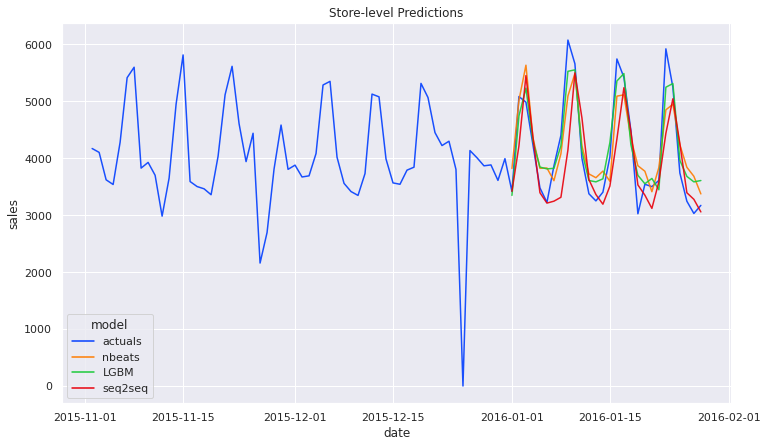

In [ ]:
viz_df = pd.concat([pd.concat([prior_range_df, actuals_df]).assign(model='actuals'), predictions_df])
viz_df = viz_df.assign(date=pd.to_datetime(viz_df.date))

fig, ax = plt.subplots(figsize=(12,7))
sns_ax = sns.lineplot(
    data=viz_df,
    x='date',
    y='sales',
    hue='model',
    ci=None,
    ax=ax,
    alpha=0.9
)

_ = sns_ax.set_title('Store-level Predictions')
fig.savefig(os.path.join(base_dir_path, 'plots/pr2_store_level.png'), bbox_inches='tight')

### Line plot of aggregated store-level model predictions

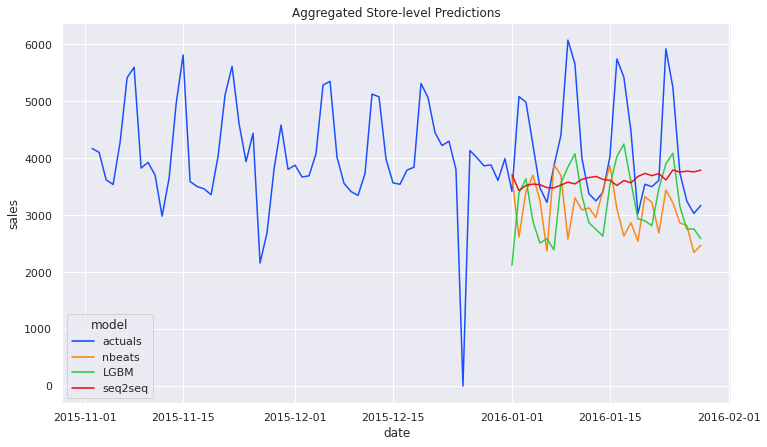

In [ ]:
predictions_df = store_agg_eval[['date', 'pred_sales_product_agg', 'model']].rename(columns=dict(pred_sales_product_agg='sales'))

viz_df = pd.concat([pd.concat([prior_range_df, actuals_df]).assign(model='actuals'), predictions_df])
viz_df = viz_df.assign(date=pd.to_datetime(viz_df.date))

fig, ax = plt.subplots(figsize=(12,7))
sns_ax = sns.lineplot(
    data=viz_df,
    x='date',
    y='sales',
    hue='model',
    ci=None,
    ax=ax,
    alpha=0.9
)

_ = sns_ax.set_title('Aggregated Store-level Predictions')
fig.savefig(os.path.join(base_dir_path, 'plots/pr2_store_level_agg.png'), bbox_inches='tight')

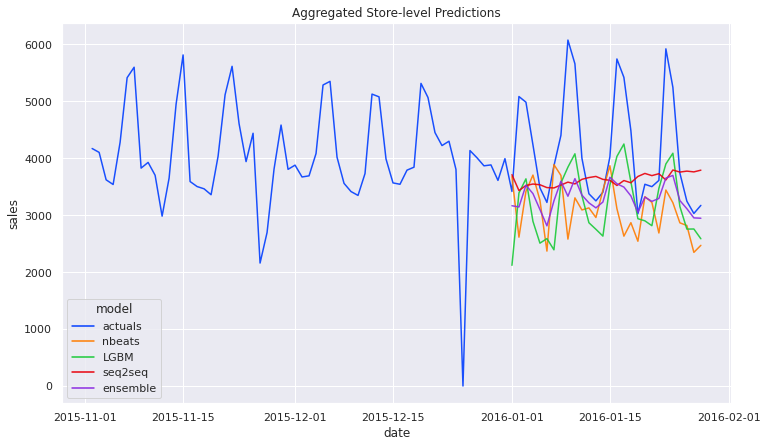

In [ ]:
# aggregated predictions from ensemble across models
predictions_df = pd.concat([
    store_agg_eval[['date', 'pred_sales_product_agg', 'model']].rename(columns=dict(pred_sales_product_agg='sales')),
    store_ensemble_agg_eval[['date', 'pred_sales_ensemble_agg', 'model']].rename(columns=dict(pred_sales_ensemble_agg='sales')).assign(model='ensemble')
])

viz_df = pd.concat([pd.concat([prior_range_df, actuals_df]).assign(model='actuals'), predictions_df])
viz_df = viz_df.assign(date=pd.to_datetime(viz_df.date))

fig, ax = plt.subplots(figsize=(12,7))
sns_ax = sns.lineplot(
    data=viz_df,
    x='date',
    y='sales',
    hue='model',
    hue_order=['actuals', 'nbeats', 'LGBM', 'seq2seq', 'ensemble'],
    ci=None,
    ax=ax,
    alpha=0.9
)

_ = sns_ax.set_title('Aggregated Store-level Predictions')
fig.savefig(os.path.join(base_dir_path, 'plots/pr2_store_level_agg_w_ensemble.png'), bbox_inches='tight')

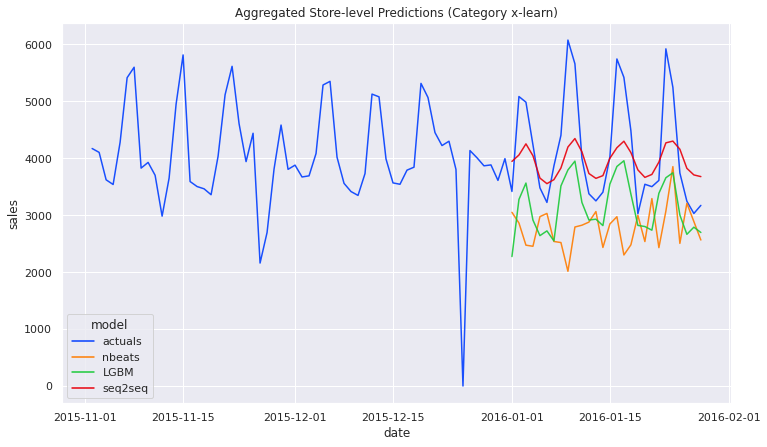

In [ ]:
predictions_df = store_cat_agg_eval[['date', 'pred_sales_product_cat_agg', 'model']].rename(columns=dict(pred_sales_product_cat_agg='sales'))

viz_df = pd.concat([pd.concat([prior_range_df, actuals_df]).assign(model='actuals'), predictions_df])
viz_df = viz_df.assign(date=pd.to_datetime(viz_df.date))

fig, ax = plt.subplots(figsize=(12,7))
sns_ax = sns.lineplot(
    data=viz_df,
    x='date',
    y='sales',
    hue='model',
    ci=None,
    ax=ax,
    alpha=0.9
)

_ = sns_ax.set_title('Aggregated Store-level Predictions (Category x-learn)')
fig.savefig(os.path.join(base_dir_path, 'plots/pr2_store_level_cat_agg.png'), bbox_inches='tight')

### Distribution plots of RMSEs for each model/product

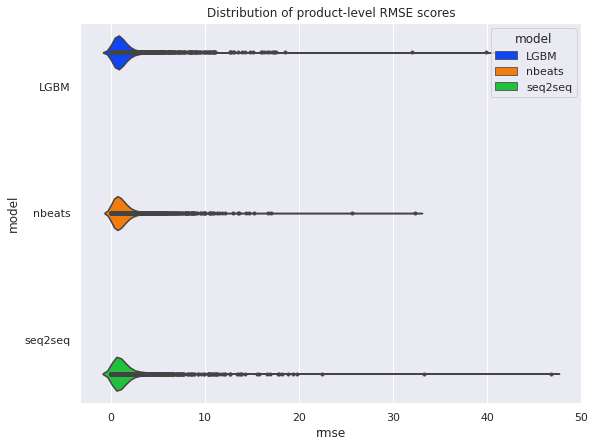

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
vax = sns.violinplot(
    data=product_rmse.reset_index(),
    y='model',
    x='rmse',
    hue='model',
    inner='point',
    ax=ax,
    orient='h',
    saturation=0.9
)
_ = vax.set_title('Distribution of product-level RMSE scores')
fig.savefig(os.path.join(base_dir_path, 'plots/pr2_product_level_dist.png'), bbox_inches='tight')

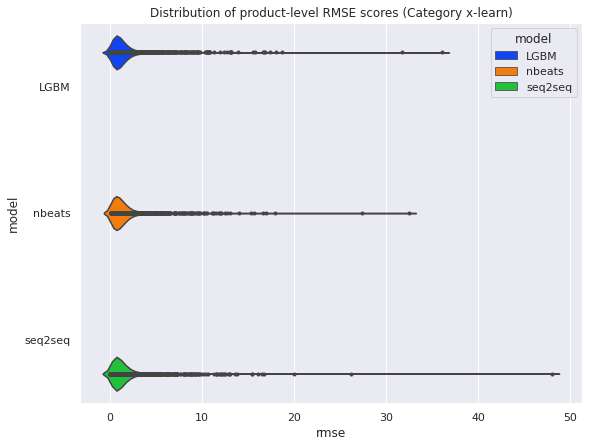

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
vax = sns.violinplot(
    data=product_cat_rmse.reset_index(),
    y='model',
    x='rmse',
    hue='model',
    inner='point',
    ax=ax,
    orient='h',
    saturation=0.9
)
_ = vax.set_title('Distribution of product-level RMSE scores (Category x-learn)')
fig.savefig(os.path.join(base_dir_path, 'plots/pr2_product_level_cat_dist.png'), bbox_inches='tight')

In [ ]:
# Quantiles of RMSE figures by model
quantiles = product_rmse.groupby(level=1).agg(dict(rmse=
    [lambda x: np.quantile(x, q=0.1), np.median, lambda x: np.quantile(x, q=0.9)]
))
quantiles.columns = ['q=0.1', 'median', 'q=0.9']

In [ ]:
quantiles.T.to_csv(os.path.join(base_dir_path, 'performance/product_rmse_quantiles.csv'))

### Distribution plots of RMSSEs for each model/product

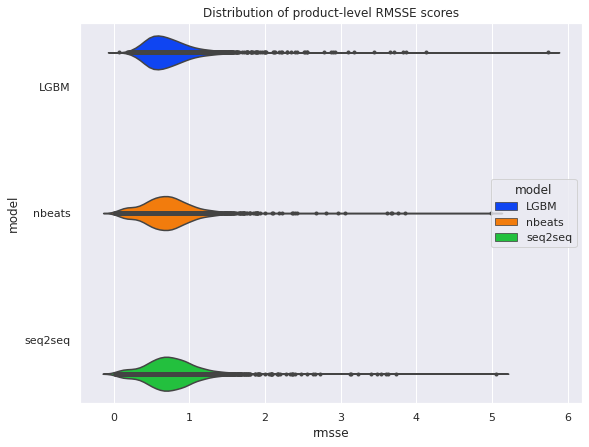

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
vax = sns.violinplot(
    data=product_rmsse_eval,
    y='model',
    x='rmsse',
    hue='model',
    inner='point',
    ax=ax,
    orient='h',
    saturation=0.9
)
_ = vax.set_title('Distribution of product-level RMSSE scores')
fig.savefig(os.path.join(base_dir_path, 'plots/pr2_product_level_rmsse_dist.png'), bbox_inches='tight')

In [ ]:
quantiles = product_rmsse_eval.groupby('model').agg(dict(rmsse=np.median))
quantiles.insert(0, column='q=0.1', value=product_rmsse_eval.groupby('model').rmsse.quantile(0.1))
quantiles.insert(2, column='q=0.9', value=product_rmsse_eval.groupby('model').rmsse.quantile(0.9))
quantiles.columns = ['q=0.1', 'median', 'q=0.9']
quantiles.to_csv(os.path.join(base_dir_path, 'performance/product_rmsse_quantiles.csv'))

### Plot of single item forecasts vs. cross-learned forecasts

In [ ]:
# change to vertical orientation for plotting
cols_to_plot = ['item_id', 'sales', 'date', 'model']

item_actuals = sales_product_train[
    (sales_product_train.item_id.isin(item_evals.item_id.unique())) &
    (sales_product_train.date >= viz_cutoff) &
    (sales_product_train.date < '2016-01-01')
][['item_id', 'sales', 'date']].assign(model='actuals')

xlearn_viz_df = pd.concat([
    item_actuals.assign(metric='single'),
    item_actuals.assign(metric='xlearn'),
    item_evals[
        ~item_evals.duplicated(subset=['item_id', 'date'], keep='first')
    ][cols_to_plot].assign(model='actuals', metric='single'),
    item_evals[
        ~item_evals.duplicated(subset=['item_id', 'date'], keep='first')
    ][cols_to_plot].assign(model='actuals', metric='xlearn'),
    item_evals[['item_id', 'pred_sales', 'date', 'model']].rename(
        columns=dict(pred_sales='sales')
        ).assign(metric='single'),
    item_evals[['item_id', 'pred_sales_xlearn', 'date', 'model']].rename(
        columns=dict(pred_sales_xlearn='sales')
        ).assign(metric='xlearn')
])

xlearn_viz_df.item_id = xlearn_viz_df.item_id.astype('category')
xlearn_viz_df.item_id =xlearn_viz_df.item_id.cat.reorder_categories(['FOODS_3_586', 'HOUSEHOLD_2_266', 'HOUSEHOLD_2_175'], ordered=True)

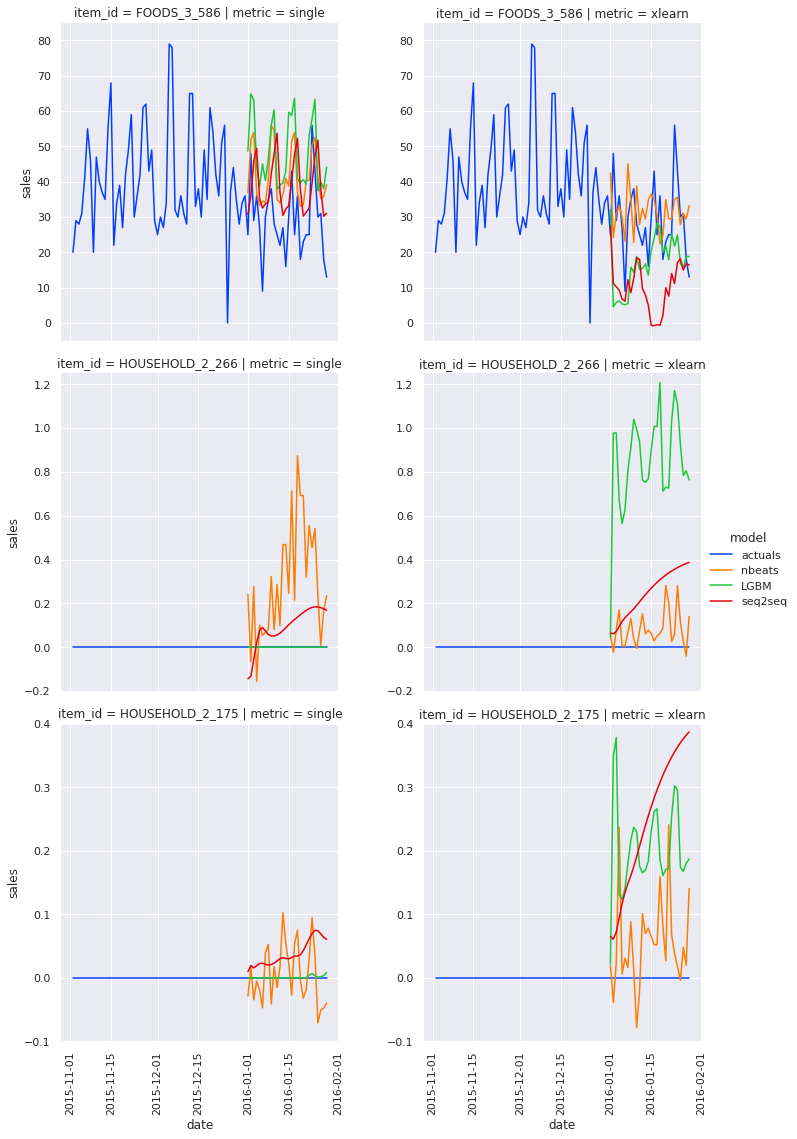

In [ ]:
g = sns.relplot(
    data=xlearn_viz_df.assign(date=pd.to_datetime(xlearn_viz_df.date)),
    kind='line',
    x='date',
    y='sales',
    hue='model',
    row='item_id',
    col='metric',
    facet_kws=dict(sharey=False)
)

_ = g.axes[2,0].set_ylim(-0.1, 0.4), g.axes[2,1].set_ylim(-0.1, 0.4)
_ = g.axes[1,0].set_ylim(-0.2, 1.25), g.axes[1,1].set_ylim(-0.2, 1.25)
_ = g.axes[0,0].set_ylim(-5, 85), g.axes[0,1].set_ylim(-5, 85)
_ = g.set_xticklabels(rotation=90)

g.savefig(os.path.join(base_dir_path, 'plots/pr2_single_vs_xlearn2.png'), bbox_inches='tight')

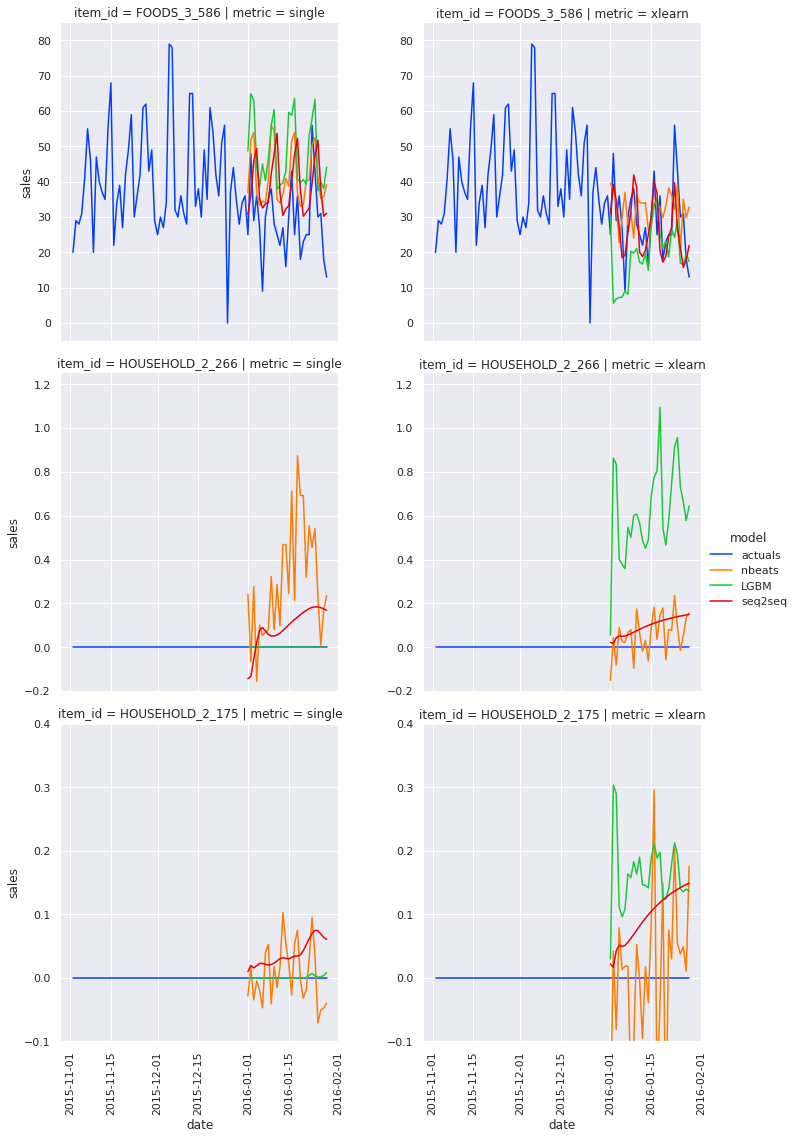

In [ ]:
# same code as above, but separate for category x-learned model
cols_to_plot = ['item_id', 'sales', 'date', 'model']

item_actuals = sales_product_train[
    (sales_product_train.item_id.isin(item_evals.item_id.unique())) &
    (sales_product_train.date >= viz_cutoff) &
    (sales_product_train.date < '2016-01-01')
][['item_id', 'sales', 'date']].assign(model='actuals')

xlearn_viz_df = pd.concat([
    item_actuals.assign(metric='single'),
    item_actuals.assign(metric='xlearn'),
    item_evals[
        ~item_evals.duplicated(subset=['item_id', 'date'], keep='first')
    ][cols_to_plot].assign(model='actuals', metric='single'),
    item_evals[
        ~item_evals.duplicated(subset=['item_id', 'date'], keep='first')
    ][cols_to_plot].assign(model='actuals', metric='xlearn'),
    item_evals[['item_id', 'pred_sales', 'date', 'model']].rename(
        columns=dict(pred_sales='sales')
        ).assign(metric='single'),
    item_evals[['item_id', 'pred_sales_xlearn', 'date', 'model']].rename(
        columns=dict(pred_sales_xlearn='sales')
        ).assign(metric='xlearn')
])

xlearn_viz_df.item_id = xlearn_viz_df.item_id.astype('category')
xlearn_viz_df.item_id =xlearn_viz_df.item_id.cat.reorder_categories(['FOODS_3_586', 'HOUSEHOLD_2_266', 'HOUSEHOLD_2_175'], ordered=True)

g = sns.relplot(
    data=xlearn_viz_df.assign(date=pd.to_datetime(xlearn_viz_df.date)),
    kind='line',
    x='date',
    y='sales',
    hue='model',
    row='item_id',
    col='metric',
    facet_kws=dict(sharey=False)
)

_ = g.axes[2,0].set_ylim(-0.1, 0.4), g.axes[2,1].set_ylim(-0.1, 0.4)
_ = g.axes[1,0].set_ylim(-0.2, 1.25), g.axes[1,1].set_ylim(-0.2, 1.25)
_ = g.axes[0,0].set_ylim(-5, 85), g.axes[0,1].set_ylim(-5, 85)
_ = g.set_xticklabels(rotation=90)

g.savefig(os.path.join(base_dir_path, 'plots/pr2_single_vs_xlearn_cat.png'), bbox_inches='tight')

### RMSSE by item attribute

In [5]:
sns.set_theme(style="darkgrid", palette="bright")
RMSSE_YLIM = (-0.4693893504169421, 6.3293150995703265) # retrieved from analysis

NameError: ignored

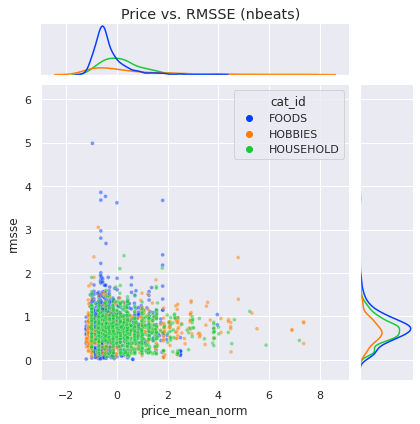

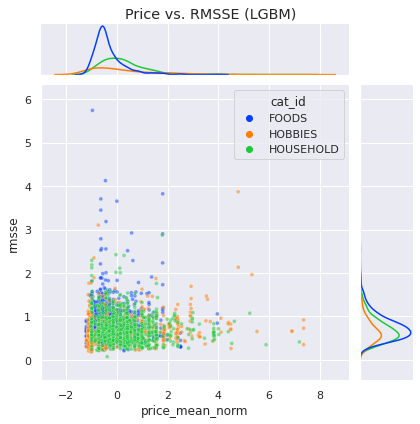

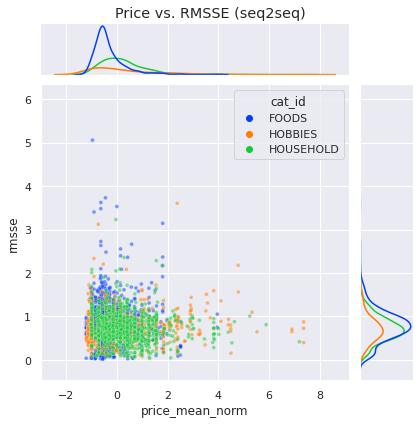

In [ ]:
for model in ['nbeats', 'LGBM', 'seq2seq']:
    g = sns.JointGrid(
        data=product_rmsse_eval[product_rmsse_eval.model==model],
        x='price_mean_norm',
        y='rmsse',
        hue='cat_id',
        ylim=RMSSE_YLIM
    )

    g.plot_joint(sns.scatterplot, s=15, alpha=0.5)
    g.plot_marginals(sns.kdeplot)
    g.fig.suptitle(f'Price vs. RMSSE ({model})')
    g.fig.subplots_adjust(top=0.94, size = (1,1))

    g.savefig(os.path.join(base_dir_path, f'plots/pr2_pricenorm_rmsse_{model}.png'), bbox_inches='tight')

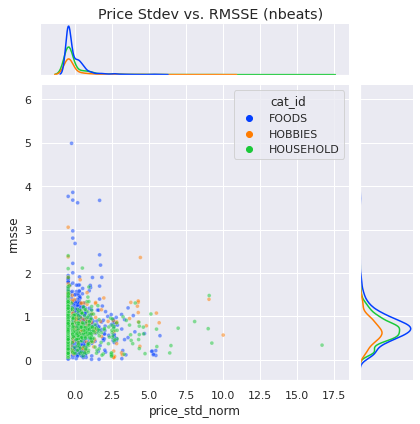

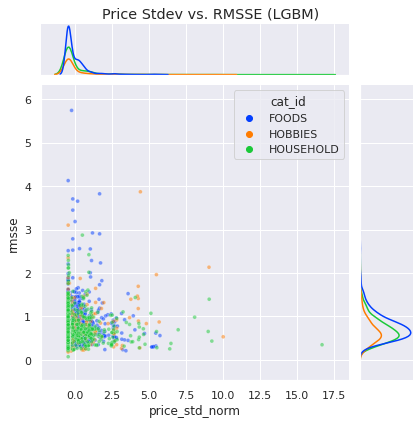

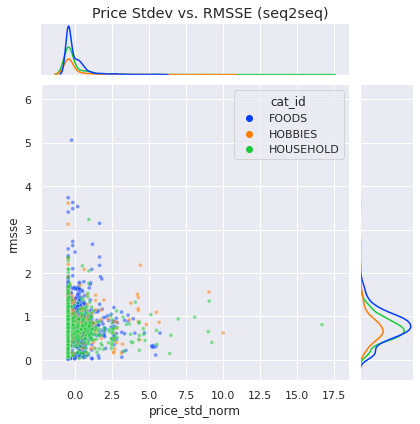

In [ ]:
# Price standard deviations
for model in ['nbeats', 'LGBM', 'seq2seq']:
    g = sns.JointGrid(
        data=product_rmsse_eval[product_rmsse_eval.model==model],
        x='price_std_norm',
        y='rmsse',
        hue='cat_id',
        ylim=RMSSE_YLIM
    )

    g.plot_joint(sns.scatterplot, s=15, alpha=0.5)
    g.plot_marginals(sns.kdeplot)
    g.fig.suptitle(f'Price Stdev vs. RMSSE ({model})')
    g.fig.subplots_adjust(top=0.94)

    g.savefig(os.path.join(base_dir_path, f'plots/pr2_pricestdnorm_rmsse_{model}.png'), bbox_inches='tight')

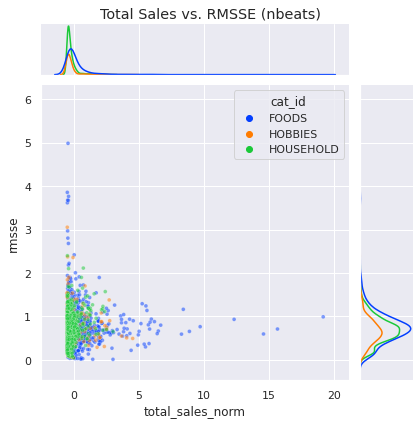

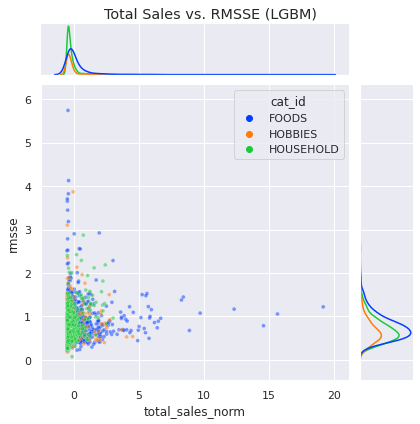

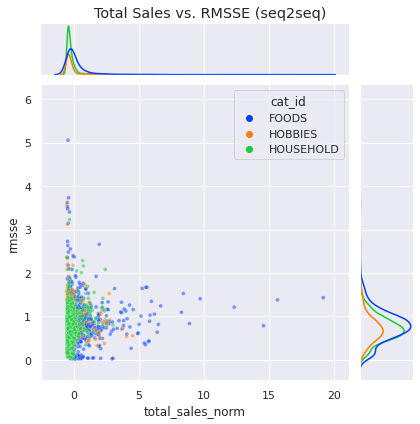

In [ ]:
# Total Sales standardized
for model in ['nbeats', 'LGBM', 'seq2seq']:
    g = sns.JointGrid(
        data=product_rmsse_eval[product_rmsse_eval.model==model],
        x='total_sales_norm',
        y='rmsse',
        hue='cat_id',
        ylim=RMSSE_YLIM
    )

    g.plot_joint(sns.scatterplot, s=15, alpha=0.5)
    g.plot_marginals(sns.kdeplot)
    g.fig.suptitle(f'Total Sales vs. RMSSE ({model})')
    g.fig.subplots_adjust(top=0.94)

    g.savefig(os.path.join(base_dir_path, f'plots/pr2_totalsales_rmsse_{model}.png'), bbox_inches='tight')

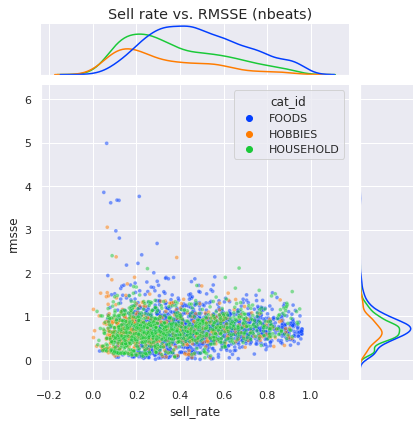

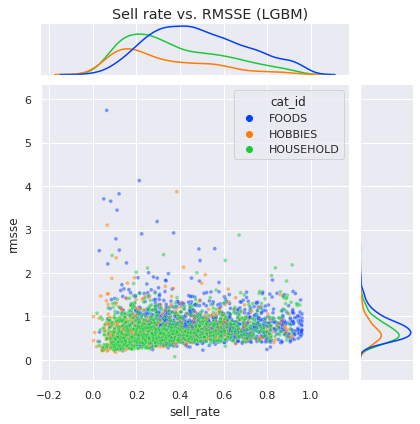

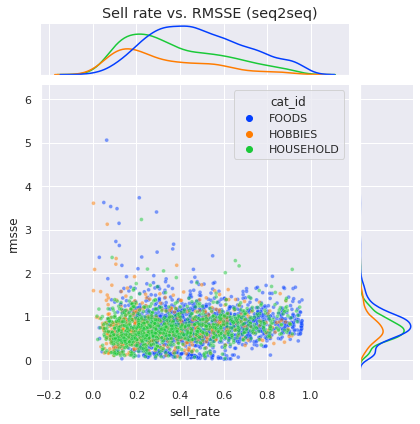

In [ ]:
# Sell rate ("sparsity")
for model in ['nbeats', 'LGBM', 'seq2seq']:
    g = sns.JointGrid(
        data=product_rmsse_eval[product_rmsse_eval.model==model],
        x='sell_rate',
        y='rmsse',
        hue='cat_id',
        ylim=RMSSE_YLIM
    )

    g.plot_joint(sns.scatterplot, s=15, alpha=0.5)
    g.plot_marginals(sns.kdeplot)
    g.fig.suptitle(f'Sell rate vs. RMSSE ({model})')
    g.fig.subplots_adjust(top=0.94)

    g.savefig(os.path.join(base_dir_path, f'plots/pr2_sellrate_rmsse_{model}.png'), bbox_inches='tight')

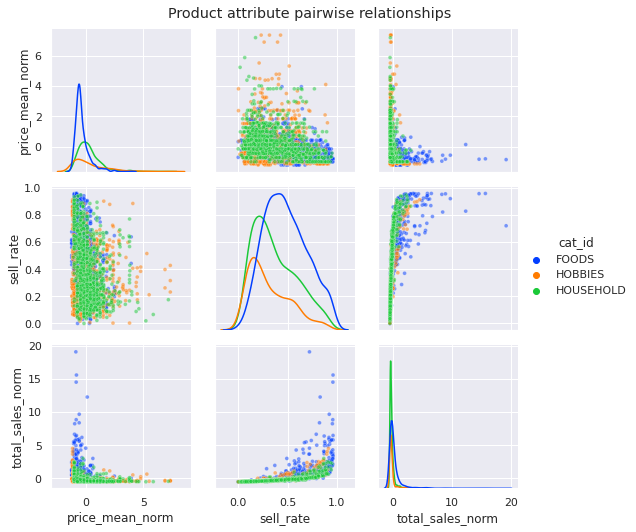

In [ ]:
g = sns.PairGrid(
    product_analysis.reset_index(),
    hue="cat_id", 
    vars=['price_mean_norm', 'sell_rate', 'total_sales_norm']
)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot, s=15, alpha=0.5)
g.add_legend()

g.fig.suptitle(f'Product attribute pairwise relationships')
g.fig.subplots_adjust(top=0.94)
g.savefig(os.path.join(base_dir_path, f'plots/pr2_attr_pairwise.png'), bbox_inches='tight')


## Ensembling